<a href="https://colab.research.google.com/github/SJinLee/BasicStats/blob/main/advanced1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
df = read.csv('timeseries.csv')

In [3]:
str(df)

'data.frame':	20 obs. of  3 variables:
 $ 연도  : chr  "2010년" "2010년" "2010년" "2010년" ...
 $ 분기  : int  1 2 3 4 1 2 3 4 1 2 ...
 $ 매출액: num  354 393 398 430 392 ...


In [4]:
# 순번
df[['X']] <- 1:nrow(df)

In [5]:
# 선형회귀
reg <- lm(매출액~X,data=df)
reg


Call:
lm(formula = 매출액 ~ X, data = df)

Coefficients:
(Intercept)            X  
    379.869        5.728  


In [6]:
# 추세변동
T = df[['X']]*reg$coefficients[2] + reg$coefficients[1]

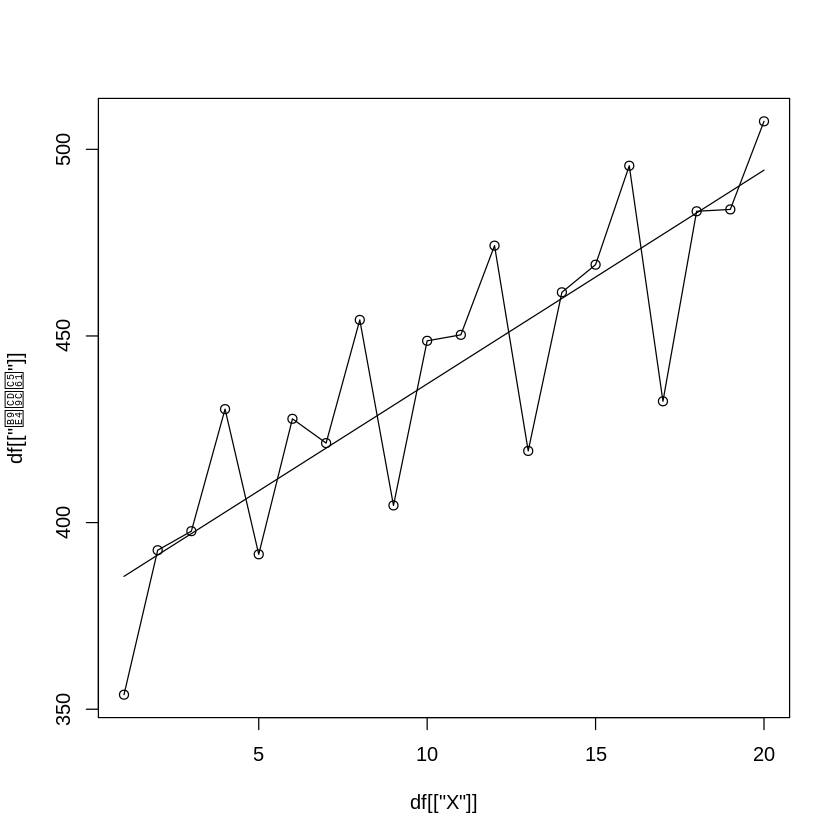

In [7]:
# 매출액과 추세변동의 그래프
plot(df[['X']],df[['매출액']],type='p')
lines(df[['X']],df[['매출액']])
lines(df[['X']],T)

In [10]:
install.packages('zoo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(dplyr)
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [12]:
df[['사분기이동평균']] <- rollmean(df[['매출액']],4, fill=NA, align='center')

In [13]:
df[['중심이동평균']] <- rollmean(df[['사분기이동평균']],2, fill=NA, align='right')

In [14]:
df[['특정계절지수']] <- df[['매출액']] / df[['중심이동평균']]

In [25]:

df[['특정계절지수']]

[1]        NA        NA 0.9983683 1.0563259 0.9438284 1.0167860 0.9904493
 [8] 1.0574646 0.9283010 1.0152445 1.0090191 1.0544221 0.9239586 1.0064854
[15] 1.0130382 1.0602487 0.9163136 1.0169616        NA        NA

In [30]:
# 계절별 평균
group <- group_by(df,분기)
s_coeff <- summarise(group,대표계절지수=mean(특정계절지수,na.rm=TRUE))
s_coeff

분기,대표계절지수
<int>,<dbl>
1,0.9281004
2,1.0138694
3,1.0027187
4,1.0571153


In [31]:
df[['대표계절지수']] <- c(s_coeff[['대표계절지수']], rep(NA,nrow(df)-nrow(s_coeff)))


In [32]:
df[['수정된대표계절지수']] <- df[['대표계절지수']] / sum(df[['대표계절지수']],na.rm=T) * 4

In [33]:
df[['계절변동']] <- rep(df[['수정된대표계절지수']][1:4],5)

In [34]:
df

연도,분기,매출액,X,사분기이동평균,중심이동평균,특정계절지수,대표계절지수,수정된대표계절지수,계절변동
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010년,1,353.9,1,NA,NA,NA,0.9281004,0.927682,0.927682
2010년,2,392.6,2,393.650,NA,NA,1.0138694,1.013412,1.013412
2010년,3,397.7,3,403.050,398.3500,0.9983683,1.0027187,1.002267,1.002267
2010년,4,430.4,4,411.850,407.4500,1.0563259,1.0571153,1.056639,1.056639
2011년,1,391.5,5,417.750,414.8000,0.9438284,NA,NA,0.927682
2011년,2,427.8,6,423.725,420.7375,1.0167860,NA,NA,1.013412
2011년,3,421.3,7,427.000,425.3625,0.9904493,NA,NA,1.002267
2011년,4,454.3,8,432.225,429.6125,1.0574646,NA,NA,1.056639
2012년,1,404.6,9,439.475,435.8500,0.9283010,NA,NA,0.927682


In [35]:
S <- df[['계절변동']]

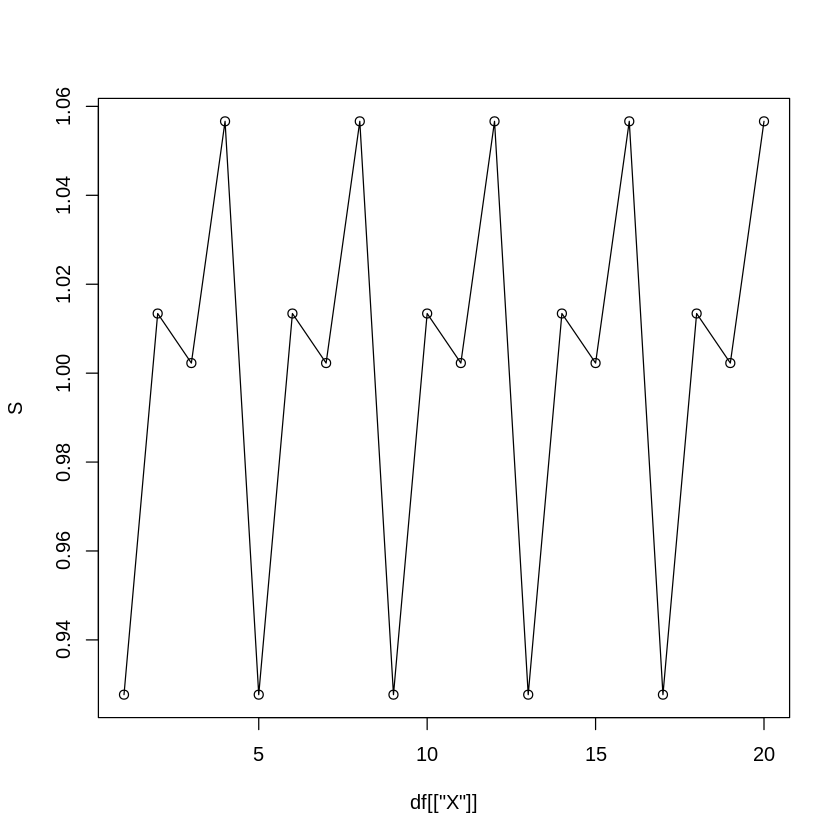

In [36]:
# 계절변동의 그래프
plot(df[['X']],S,type='p')
lines(df[['X']],S)

In [37]:
# 순환 및 불규칙 변동
CI <- df[['매출액']] / T / S

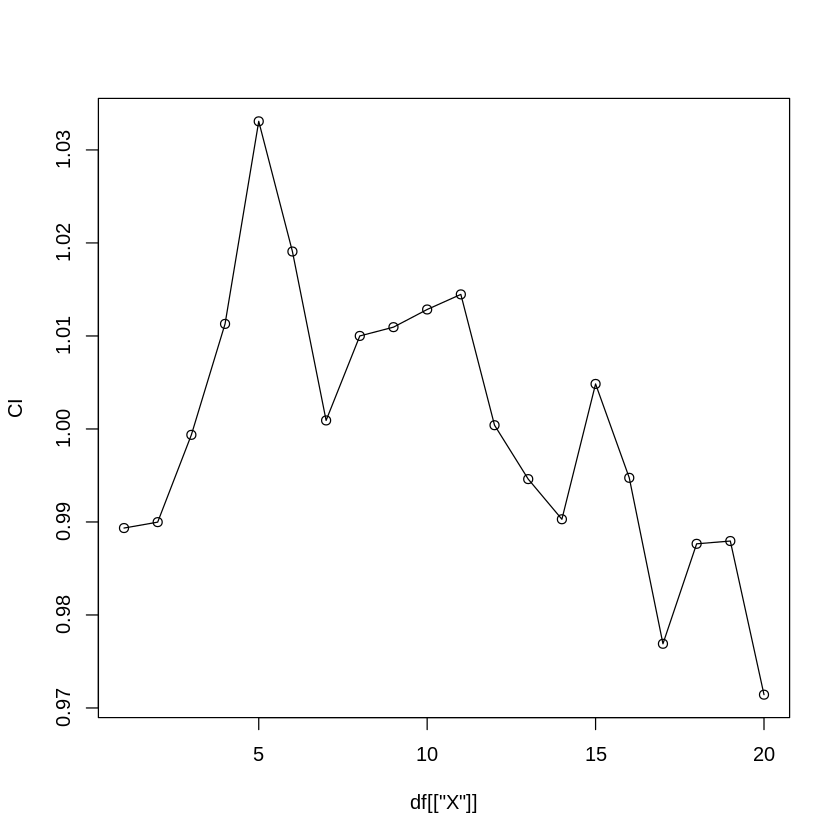

In [38]:
plot(df[['X']],CI,type='p')
lines(df[['X']],CI)

In [39]:
# 분석결과 수집
df2 <- df['매출액']
df2[['추세변동']] <- T
df2[['계절변동']] <- S
df2[['순환및불규칙변동']] <- CI

In [40]:
df2[['순환변동']] <- rollmean(df2[['순환및불규칙변동']],3, fill=NA, align='right')

In [41]:
df2[['불규칙변동']]  <- CI / df2[['순환변동']]

In [42]:
df2

매출액,추세변동,계절변동,순환및불규칙변동,순환변동,불규칙변동
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
353.9,385.5971,0.927682,0.9893447,NA,NA
392.6,391.3248,1.013412,0.9899807,NA,NA
397.7,397.0525,1.002267,0.9993655,0.9928969,1.0065148
430.4,402.7802,1.056639,1.0112945,1.0002135,1.0110786
391.5,408.5078,0.927682,1.0330759,1.0145786,1.0182315
427.8,414.2355,1.013412,1.0190776,1.0211493,0.9979712
421.3,419.9632,1.002267,1.0009144,1.0176893,0.9835167
454.3,425.6908,1.056639,1.0100012,1.0099977,1.0000034
404.6,431.4185,0.927682,1.0109460,1.0072872,1.0036324


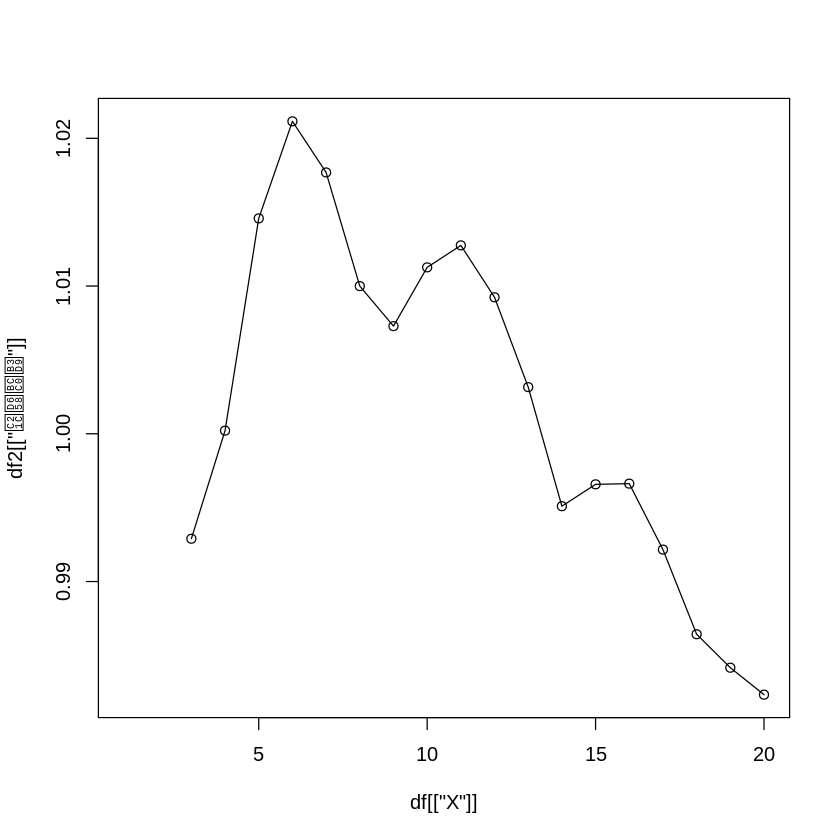

In [43]:
# 순환변동의 그래프
plot(df[['X']],df2[['순환변동']],type='p')
lines(df[['X']],df2[['순환변동']])

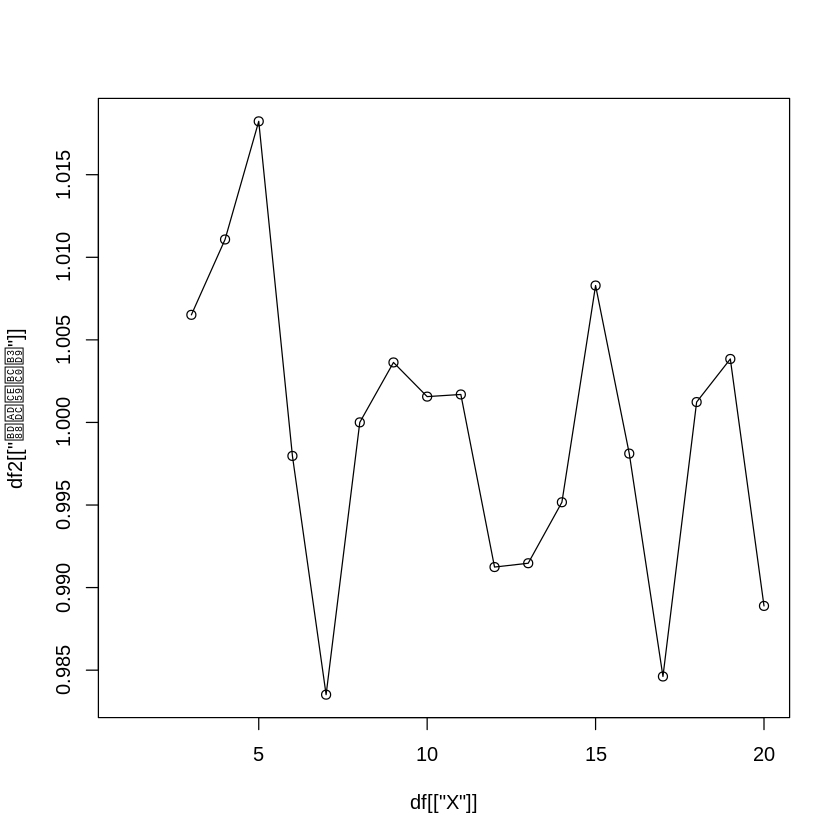

In [44]:
# 불규칙변동의 그래프
plot(df[['X']],df2[['불규칙변동']],type='p')
lines(df[['X']],df2[['불규칙변동']])